In [1]:
import pandas as pd
import numpy as np
import re
import tweepy
import datetime
from pandas_datareader import data as web
from textblob import TextBlob
from sklearn.svm import SVR
from treeinterpreter import treeinterpreter as ti
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
consumer_key = "W8olFrRLK7Lt7BUh6YAbdSG4h"
consumer_secret = "izRdiwC73rntSdMdAQm2gL8zFNAHVLa99A8dI99w0Lz16jvNrx"

access_token = "620364433-Kj5up6bB6KLfl5wfmxxcAnWthse5o38P2MKABM00"
access_token_secret = "Faxxv0hb54KF7MmakQ8WZmvaCC5YIprcWhiOuEyQY2iLt"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

fetch_tweets=tweepy.Cursor(api.search, q="#TSLA",count=100, lang ="en",since="2019-9-25", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

data.to_csv("TeslaTweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
print("Created CSV")

Created CSV


In [3]:
data = pd.read_csv('C:/Users/prane/Desktop/Likhitha/Summer_2020/DataScience/FinalProject/Elontweets.csv')

In [4]:
cdata=pd.DataFrame(columns=['Date','Tweets'])
print(len(data))

2224


In [5]:
##clean up the tweets
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    cdata.sort_index()
    cdata.at[index,'Date'] =row["Date"]
    cdata.at[index,'Tweets']= my_new_string
    #index=index+1
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [6]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        ccdata.at[indx,'Date']=get_date
        ccdata.at[indx,'Tweets']=get_tweet
        indx+=1
        get_tweet=" "

In [7]:
ccdata = pd.read_csv('C:/Users/prane/Desktop/Likhitha/Summer_2020/DataScience/FinalProject/Tesla_tweets_old.csv')
ccdata.head()

,Unnamed: 0,Date,Tweets
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...
1,1,9/28/2017,kevinroose Just another day in the office Fas...
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...
4,4,9/25/2017,Daimler Good Major improvements some unexpec...


% of positive tweets=  87.97814207650273
% of negative tweets=  12.021857923497267


[]

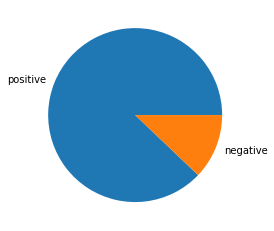

In [8]:
ccdata['polarity'] = 0.0000
ccdata['confidence'] =0.0000
for index,row in ccdata.iterrows():
    analysis = TextBlob(ccdata['Tweets'][index])
    sentiment, confidence  = analysis.sentiment
    ccdata.at[index,'polarity'] = sentiment
    ccdata.at[index,'confidence'] = confidence
    
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata['polarity'][i]
    if(float(get_val)<(0)):
        nega=nega+1
    else:
        posi=posi+1
        
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
plt.pie(arr,labels=['positive','negative'])
plt.plot()

In [9]:
start = datetime.datetime(2012,10,26)
## Let's get Tesla stock data; Tesla's ticker symbol is TSLA
## First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, 
##fourth is the end date
tesla = web.DataReader('TSLA', 'yahoo', start)
#tesla.to_csv('TESLA_stock_price.csv')

In [10]:

read_stock_p=pd.read_csv('C:/Users/prane/Desktop/Likhitha/Summer_2020/DataScience/FinalProject/tesla_stock_price.csv')
read_stock_p.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,10/26/2012,27.799999,27.020000,27.530001,27.379999,477400,27.379999
1,10/31/2012,28.350000,27.370001,27.700001,28.129999,775200,28.129999
2,11/1/2012,29.490000,28.200001,28.250000,29.250000,1024100,29.250000
3,11/2/2012,29.549999,28.549999,29.270000,28.920000,1030300,28.920000
4,11/5/2012,31.580000,29.330000,29.799999,31.500000,2048900,31.500000


In [11]:
ccdata['Prices']=""
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]             
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            ccdata.at[i,'Prices']=int(read_stock_p.Close[j])
            break

In [12]:
"""Show that there are some empty fields for days when stock Market is closed"""

'Show that there are some empty fields for days when stock Market is closed'

In [13]:
ccdata.head(8)

,Unnamed: 0,Date,Tweets,polarity,confidence,Prices
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...,0.156151,0.432341,341
1,1,9/28/2017,kevinroose Just another day in the office Fas...,0.500000,0.600000,339
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...,-0.133333,0.233333,340
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...,0.350000,0.300000,345
4,4,9/25/2017,Daimler Good Major improvements some unexpec...,0.287500,0.700000,344
5,9,9/16/2017,Richwsadler Does my hivemind count as me Bobb...,-0.125000,0.250000,
6,11,9/14/2017,High res version at httpstcoYysKftHhoz jovani...,0.187143,0.305714,377
7,13,9/12/2017,RT Gizmodo Hackers have already started to we...,-0.600000,1.000000,362


In [14]:
"""Filling empty price with previous day price"""
for i in range(1,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
            ccdata.Prices.iloc[i]=int(ccdata.Prices.iloc[i-1])

#ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

C:\Users\prane\.conda\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
ccdata.head(6)
len(ccdata)

549

In [16]:
ccdata['percentchange'] = 0.0000
print(len(ccdata))
for i in range(len(ccdata)-1,0,-1):
    ccdata.at[i-1,'percentchange']=float((ccdata.Prices.iloc[i-1]-ccdata.Prices.iloc[i])/ccdata.Prices.iloc[i-1])

#ccdata['percent change'] = ccdata['percent change'].apply(np.float)
ccdata.head()

549


,Unnamed: 0,Date,Tweets,polarity,confidence,Prices,percentchange
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...,0.156151,0.432341,341,0.005865
1,1,9/28/2017,kevinroose Just another day in the office Fas...,0.500000,0.600000,339,-0.002950
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...,-0.133333,0.233333,340,-0.014706
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...,0.350000,0.300000,345,0.002899
4,4,9/25/2017,Daimler Good Major improvements some unexpec...,0.287500,0.700000,344,0.000000


In [17]:
ccdata.to_csv("Tesla_tweets_with_stocks_old.csv")

In [18]:
ccdata.head()

,Unnamed: 0,Date,Tweets,polarity,confidence,Prices,percentchange
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...,0.156151,0.432341,341,0.005865
1,1,9/28/2017,kevinroose Just another day in the office Fas...,0.500000,0.600000,339,-0.002950
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...,-0.133333,0.233333,340,-0.014706
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...,0.350000,0.300000,345,0.002899
4,4,9/25/2017,Daimler Good Major improvements some unexpec...,0.287500,0.700000,344,0.000000


In [19]:
dataframe=ccdata[['Date','Prices','polarity','confidence','percentchange']].copy()

In [20]:
#Divide data into train and test 
train_data_start = 200
train_data_end = 549
test_data_start = 0
test_data_end = 199
train = dataframe.iloc[train_data_start: train_data_end]
test = dataframe.iloc[test_data_start:test_data_end]

In [21]:
train.head()

,Date,Prices,polarity,confidence,percentchange
200,9/9/2016,194,0.115278,0.405556,-0.030928
201,9/1/2016,200,0.000000,0.000000,-0.060000
202,8/31/2016,212,0.201389,0.422222,0.004717
203,8/30/2016,211,0.000000,0.400000,-0.018957
204,8/29/2016,215,0.500000,0.500000,0.000000


In [22]:
train1 = train.to_numpy()
test1 = test.to_numpy()
numpy_dataframe_train= np.array([x[2:6] for x in train1])

numpy_dataframe_test= np.array([x[2:6] for x in test1])

In [23]:

list_of_sentiments_score = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'polarity']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_train = np.asarray(list_of_sentiments_score)

In [24]:
list_of_sentiments_score = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'polarity']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_test = np.asarray(list_of_sentiments_score)

In [25]:
y_train = pd.DataFrame(train['percentchange'])
#y_train=[91,91,91,92,91,92,91]
y_test = pd.DataFrame(test['percentchange'])

In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

In [27]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_dataframe_train, y_train.values.ravel())
prediction_tree, bias, contributions = ti.predict(rf, numpy_dataframe_test)
prediction_rf = rf.predict(numpy_dataframe_test)
rf.score(numpy_dataframe_train,y_train.values.ravel())

C:\Users\prane\.conda\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.45632250440797506

In [28]:
rf.score(numpy_dataframe_test,y_test)

-1.8920124163547694

In [29]:
import matplotlib.pyplot as plt

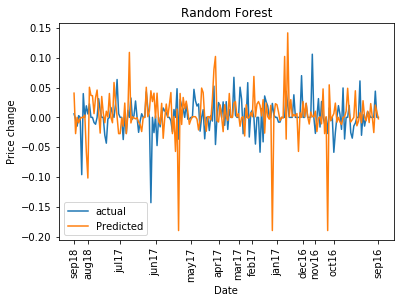

In [30]:
date_test = np.array([x[0] for x in test1])
labels= ['sep18','aug18','jul17','jun17','may17','apr17','mar17','feb17',
         'jan17','dec16','nov16','oct16','sep16']
x_array = ['9/29/2017','8/31/2017','7/31/2017','6/30/2017','5/31/2017','4/29/2017','3/28/2017',
           '2/28/2017','1/29/2017','12/30/2016','11/24/2016','10/29/2016','9/13/2016']
plt.plot(date_test,y_test, label="actual")
plt.xticks(x_array,labels,rotation='vertical')
plt.plot(date_test,prediction_rf, label="Predicted")
plt.xlabel('Date') 
plt.ylabel('Price change')
plt.title('Random Forest')
plt.legend()
plt.show()

In [31]:
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', 
                     solver='lbfgs', alpha=0.005, learning_rate_init = 0.001)
mlpr.fit(numpy_dataframe_train, train['percentchange'])   
prediction_mlp = mlpr.predict(numpy_dataframe_test)

In [32]:
mlpr.score(numpy_dataframe_train, train['Prices'])

-5.977229482301345

In [33]:
mlpr.score(numpy_dataframe_test, test['Prices'])

-20.811658723908433

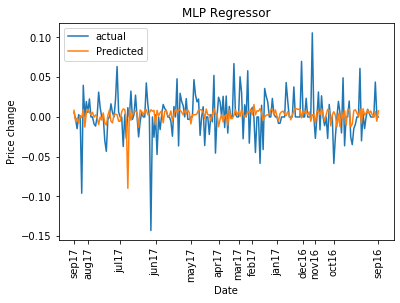

In [34]:
date_test = np.array([x[0] for x in test1])
labels= ['sep17','aug17','jul17','jun17','may17','apr17','mar17','feb17',
         'jan17','dec16','nov16','oct16','sep16']
x_array = ['9/29/2017','8/31/2017','7/31/2017','6/30/2017','5/31/2017','4/29/2017','3/28/2017',
           '2/28/2017','1/29/2017','12/30/2016','11/24/2016','10/29/2016','9/13/2016']
plt.plot(date_test,y_test, label="actual")
plt.xticks(x_array,labels,rotation='vertical')
plt.plot(date_test,prediction_mlp, label="Predicted")
plt.xlabel('Date') 
plt.ylabel('Price change')
plt.title('MLP Regressor')
plt.legend()
plt.show()

In [35]:
from sklearn import datasets
from datetime import datetime, timedelta
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(numpy_dataframe_train, train['percentchange'])   
prediction_linear = regr.predict(numpy_dataframe_test)
regr.score(numpy_dataframe_test,y_test)

-0.00046942548345740853

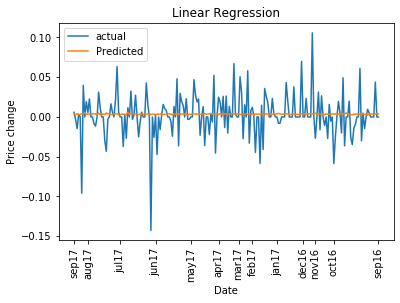

In [36]:
date_test = np.array([x[0] for x in test1])
labels= ['sep17','aug17','jul17','jun17','may17','apr17','mar17','feb17',
         'jan17','dec16','nov16','oct16','sep16']
x_array = ['9/29/2017','8/31/2017','7/31/2017','6/30/2017','5/31/2017','4/29/2017','3/28/2017',
           '2/28/2017','1/29/2017','12/30/2016','11/24/2016','10/29/2016','9/13/2016']
plt.plot(date_test,y_test, label="actual")
plt.xticks(x_array,labels,rotation='vertical')
plt.plot(date_test,prediction_linear, label="Predicted")
plt.xlabel('Date') 
plt.ylabel('Price change')
plt.title('Linear Regression')
plt.legend()
plt.show()